In [1]:
import sympy as smp

r1, r2 = smp.symbols('r1 r2 ', real=True, positive=True)
theta = smp.symbols('theta')
theta1, phi1 = smp.symbols('theta_1 phi_1')
theta2, phi2 = smp.symbols('theta_2 phi_2')

x1 = smp.Function(r'x1')(r1, theta1, phi1)
x2 = smp.Function(r'x2')(r2, theta2, phi2)

y1 = smp.Function(r'x1')(r1, theta1, phi1)
y2 = smp.Function(r'x2')(r2, theta2, phi2)

z1 = smp.Function(r'x1')(r1, theta1)
z2 = smp.Function(r'x2')(r2, theta2)

Psi = smp.Function('Psi')(r1, theta1, phi1, r2, theta2, phi2)
V = smp.Function('V')(r1, theta1, phi1, r2, theta2, phi2)
absolute_diff = smp.sqrt(r1**2 + r2**2 - 2*r1*r2*smp.cos(theta))

V_eff = -2/r1 - 2/r2 + 1/(absolute_diff)
Laplacian = (1/r1**2) * smp.diff(r1**2 * smp.diff(Psi, r1), r1) + (1/r2**2) * smp.diff(r2**2 * smp.diff(Psi, r2), r2) + (1/(r1**2 * smp.sin(theta1))) * smp.diff(smp.sin(theta1) * smp.diff(Psi, theta1), theta1) + (1/(r2**2 * smp.sin(theta2))) * smp.diff(smp.sin(theta2) * smp.diff(Psi, theta2), theta2) + (1/(r1**2 * smp.sin(theta1)**2)) * smp.diff(smp.diff(Psi, phi1), phi1) + (1/(r2**2 * smp.sin(theta2)**2)) * smp.diff(smp.diff(Psi, phi2), phi2)

In [2]:
x1 = r1 * smp.sin(theta1) * smp.cos(phi1)
x2 = r2 * smp.sin(theta2) * smp.cos(phi2)

y1 = r1 * smp.sin(theta1) * smp.sin(phi1)
y2 = r2 * smp.sin(theta2) * smp.sin(phi2)

z1 = r1 * smp.cos(theta1)
z2 = r2 * smp.cos(theta2)

In [3]:
Phi_1 = smp.Function('\Phi_1')(r1,theta1, phi1, r2, theta2, phi2)
Phi_2 = smp.Function('\Phi_2')(r1,theta1, phi1, r2, theta2, phi2)
Phi_3 = smp.Function('\Phi_3')(r1,theta1, phi1, r2, theta2, phi2)
Phi_4 = smp.Function('\Phi_4')(r1,theta1, phi1, r2, theta2, phi2)
Phi_5 = smp.Function('\Phi_5')(r1,theta1, phi1, r2, theta2, phi2)
Phi_6 = smp.Function('\Phi_6')(r1,theta1, phi1, r2, theta2, phi2)
Phi_7 = smp.Function('\Phi_7')(r1,theta1, phi1, r2, theta2, phi2)

In [4]:
Phi_1 = smp.exp(-2 * (r1 + r2))
Phi_2 = smp.exp(-2 * (r1 + r2)) * (r1 + r2)
Phi_3 = smp.exp(-2 * (r1 + r2)) * (absolute_diff)
Phi_4 = smp.exp(-2 * (r1 + r2)) * r1 * r2
Phi_5 = smp.exp(-2 * (r1 + r2)) * (r1**2 + r2**2)
Phi_6 = smp.exp(-2 * (r1 + r2)) * (absolute_diff)**2
Phi_7 = smp.exp(-2 * (r1 + r2)) * (r1 + r2) * (absolute_diff)

In [5]:
r1_cartesian = smp.Matrix([x1, y1, z1])
r2_cartesian = smp.Matrix([x2, y2, z2])

# Compute the dot product
dot_product = r1_cartesian.dot(r2_cartesian)

magnitude_r1 = smp.sqrt(x1**2 + y1**2 + z1**2)
magnitude_r2 = smp.sqrt(x2**2 + y2**2 + z2**2)

# Compute cos(theta) and sin(theta)
cos_theta = dot_product / (magnitude_r1 * magnitude_r2)
sin_theta = smp.sqrt(1 - cos_theta**2)

In [6]:
Phi_1 = Phi_1.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_2 = Phi_2.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_3 = Phi_3.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_4 = Phi_4.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_5 = Phi_5.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_6 = Phi_6.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_7 = Phi_7.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)

In [7]:
V_eff = V_eff.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Hamiltonian = Laplacian + V * Psi

In [8]:
Hamiltonian

Psi(r1, theta_1, phi_1, r2, theta_2, phi_2)*V(r1, theta_1, phi_1, r2, theta_2, phi_2) + (r2**2*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), (r2, 2)) + 2*r2*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), r2))/r2**2 + (sin(theta_2)*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), (theta_2, 2)) + cos(theta_2)*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), theta_2))/(r2**2*sin(theta_2)) + Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), (phi_2, 2))/(r2**2*sin(theta_2)**2) + (r1**2*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), (r1, 2)) + 2*r1*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), r1))/r1**2 + (sin(theta_1)*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), (theta_1, 2)) + cos(theta_1)*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), theta_1))/(r1**2*sin(theta_1)) + Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), (phi_1, 2))/(r1**2*sin(theta_1)**2)

In [9]:
H_Phi_1 = Hamiltonian.subs({Psi: Phi_1, V:V_eff}).simplify()

In [10]:
H_Phi_2 = Hamiltonian.subs({Psi: Phi_2, V:V_eff}).simplify()

In [11]:
H_Phi_3 = Hamiltonian.subs({Psi: Phi_3, V:V_eff}).simplify()

In [12]:
H_Phi_4 = Hamiltonian.subs({Psi: Phi_4, V:V_eff}).simplify()

In [13]:
H_Phi_5 = Hamiltonian.subs({Psi: Phi_5, V:V_eff}).simplify()

In [14]:
H_Phi_6 = Hamiltonian.subs({Psi: Phi_6, V:V_eff}).simplify()

In [15]:
H_Phi_7 = Hamiltonian.subs({Psi: Phi_7, V:V_eff}).simplify()

In [16]:
f_11 = (Phi_1 * H_Phi_1) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# f_11 = f_11.simplify()
# f_11

In [17]:
f_12 = (Phi_1 * H_Phi_2) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# f_12 = f_12.simplify()
# f_12

In [18]:
f_13 = (Phi_1 * H_Phi_3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# f_13 = f_13.simplify()
# f_13

In [19]:
f_14 = (Phi_1 * H_Phi_4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# f_14 = f_14.simplify()
# f_14

In [20]:
f_15 = (Phi_1 * H_Phi_5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# f_15 = f_15.simplify()
# f_15

In [21]:
f_16 = (Phi_1 * H_Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# f_16 = f_16.simplify()
# f_16

In [22]:
f_17 = (Phi_1 * H_Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# f_17 = f_17.simplify()
# f_17

In [23]:
f_22 = (Phi_2 * H_Phi_2) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# f_22 = f_22.simplify()
# f_22

In [24]:
f_23 = (Phi_2 * H_Phi_3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# f_23 = f_23.simplify()
# f_23

In [25]:
f_24 = (Phi_2 * H_Phi_4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# f_24 = f_24.simplify()
# f_24

In [26]:
f_25 = (Phi_2 * H_Phi_5) * r1**2 * r2**2  * smp.sin(theta1) * smp.sin(theta2)
# f_25 = f_25.simplify()
# f_25

In [27]:
f_26 = (Phi_2 * H_Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# f_26 = f_26.simplify()
# f_26

In [28]:
f_27 = (Phi_2 * H_Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# f_27 = f_27.simplify()
# f_27

In [29]:
f_33 = (Phi_3 * H_Phi_3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# f_33 = f_33.simplify()
# f_33

In [30]:
f_34 = (Phi_3 * H_Phi_4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# f_34 = f_34.simplify()
# f_34

In [31]:
f_35 = (Phi_3 * H_Phi_5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# f_35 = f_35.simplify()
# f_35

In [32]:
f_36 = (Phi_3 * H_Phi_6) * r1**2 * r2**2  * smp.sin(theta1) * smp.sin(theta2)
# f_36 = f_36.simplify()
# f_36

In [33]:
f_37 = (Phi_3 * H_Phi_7) * r1**2 * r2**2  * smp.sin(theta1) * smp.sin(theta2)
# f_37 = f_37.simplify()
# f_37

In [34]:
f_44 = (Phi_4 * H_Phi_4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# f_44 = f_44.simplify()
# f_44

In [35]:
f_45 = (Phi_4 * H_Phi_5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# f_45 = f_45.simplify()
# f_45

In [36]:
f_46 = (Phi_4 * H_Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# f_46 = f_46.simplify()
# f_46

In [37]:
f_47 = (Phi_4 * H_Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# f_47 = f_47.simplify()
# f_47

In [38]:
f_55 = (Phi_5 * H_Phi_5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# f_55 = f_55.simplify()
# f_55

In [39]:
f_56 = (Phi_5 * H_Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# f_56 = f_56.simplify()
# f_56

In [40]:
f_57 = (Phi_5 * H_Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# f_57 = f_57.simplify()
# f_57

In [41]:
f_66 = (Phi_6 * H_Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# f_66 = f_66.simplify()
# f_66

In [42]:
f_67 = (Phi_6 * H_Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# f_67 = f_67.simplify()
# f_67

In [43]:
f_77 = (Phi_7 * H_Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
# f_77 = f_77.simplify()
# f_77

In [44]:
P_1 = f_11 + f_22 + f_33 + f_44 + f_55 + f_66 + f_77
P_2 = f_11 + f_12 + f_13 + f_14 + f_15 + f_16 + f_17 + f_22 + f_23 + f_24 + f_25 + f_26 + f_27 + f_33 + f_34 + f_35 + f_36 + f_37 + f_44 + f_45 + f_46 + f_47 + f_55 + f_56 + f_57 + f_66 + f_67 + f_77

In [45]:
f_11_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_11)
f_12_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_12)
f_13_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_13)
f_14_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_14)
f_15_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_15)
f_16_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_16)
f_17_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_17)
f_22_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_22)
f_23_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_23)
f_24_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_24)
f_25_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_25)
f_26_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_26)
f_27_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_27)
f_33_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_33)
f_34_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_34)
f_35_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_35)
f_36_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_36)
f_37_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_37)
f_44_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_44)
f_45_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_45)
f_46_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_46)
f_47_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_47)
f_55_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_55)
f_56_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_56)
f_57_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_57)
f_66_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_66)
f_67_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_67)
f_77_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_77)

P_1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], P_1)
P_2_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], P_2)

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

r1 = np.linspace(0, 5, 10)
r2 = np.linspace(0, 5, 10)

theta1 = np.linspace(0, np.pi, 10)
theta2 = np.linspace(0, np.pi, 10)

phi1 = np.linspace(0, 2*np.pi, 10)
phi2 = np.linspace(0, 2*np.pi, 10)

R1, Theta1, Phi1, R2, Theta2, Phi2 = np.meshgrid(r1, theta1, phi1, r2, theta2, phi2)

In [47]:
F_11_6d = f_11_f(R1, Theta1, Phi1, R2, Theta2, Phi2)
P_1_6d = P_1_f(R1, Theta1, Phi1, R2, Theta2, Phi2)

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in sqrt
  return r1**2*r2**2*(8*exp(-2*r1 - 2*r2) + exp(-2*r1 - 2*r2)/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 6*exp(-2*r1 - 2*r2)/r2 - 6*exp(-2*r1 - 2*r2)/r1)*exp(-2*r1 - 2*r2)*sin(theta_1)*sin(theta_2)
<lambdifygenerated-1>:2: RuntimeWarning: divide by zero encountered in divide
  return r1**2*r2**2*(8*exp(-2*r1 - 2*r2) + exp(-2*r1 - 2*r2)/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 6*exp(-2*r1 - 2*r2)/r2 - 6*exp(-2*r1 - 2*r2)/r1)*exp(-2*r1 - 2*r2)*sin(theta_1)*sin(theta_2)
<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in subtract
  return r1**2*r2**2*(8*exp(-2*r1 - 2*r2) + exp(-2*r1 - 2*r2)/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 6*exp(-2*r1 - 2*r2)/r2 - 6*exp(-2*r1 - 2*r2)/r1)*exp(-2*r

In [48]:
P_1_6d.shape

(10, 10, 10, 10, 10, 10)

## Monte Carlo Integration and Metropolis Algorithm

In [52]:
r1 = np.linspace(0, 5, 10)
r2 = np.linspace(0, 5, 10)

theta1 = np.linspace(0, np.pi, 10)
theta2 = np.linspace(0, np.pi, 10)

phi1 = np.linspace(0, 2*np.pi, 10)
phi2 = np.linspace(0, 2*np.pi, 10)

R1, Theta1, Phi1, R2, Theta2, Phi2 = np.meshgrid(r1, theta1, phi1, r2, theta2, phi2)

In [53]:
import pandas as pd

# Flatten the arrays
R1_flat = R1.flatten()
R2_flat = R2.flatten()
Theta1_flat = Theta1.flatten()
Theta2_flat = Theta2.flatten()
Phi1_flat = Phi1.flatten()
Phi2_flat = Phi2.flatten()
F11_flat = F_11_6d.flatten()
P1_flat = P_1_6d.flatten()

# Create the DataFrame
df = pd.DataFrame({'r1': R1_flat, 'theta1': Theta1_flat, 'phi1': Phi1_flat, 'r2': R2_flat, 'theta2': Theta2_flat, 'phi2': Phi2_flat, 'F11': F11_flat, 'P1': P1_flat})

# Display the DataFrame
df

,r1,theta1,phi1,r2,theta2,phi2,F11,P1
0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN
1,0.0,0.000000,0.000000,0.0,0.000000,0.698132,NaN,NaN
2,0.0,0.000000,0.000000,0.0,0.000000,1.396263,NaN,NaN
3,0.0,0.000000,0.000000,0.0,0.000000,2.094395,NaN,NaN
4,0.0,0.000000,0.000000,0.0,0.000000,2.792527,NaN,NaN
...,...,...,...,...,...,...,...,...
999995,5.0,3.141593,6.283185,5.0,3.141593,3.490659,inf,NaN
999996,5.0,3.141593,6.283185,5.0,3.141593,4.188790,inf,NaN
999997,5.0,3.141593,6.283185,5.0,3.141593,4.886922,inf,NaN
999998,5.0,3.141593,6.283185,5.0,3.141593,5.585054,inf,NaN


In [54]:
# Remove rows with nan or inf values in 'F11' or 'P1' columns
df_new = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['F11', 'P1'])

# Display the cleaned DataFrame
df_new

,r1,theta1,phi1,r2,theta2,phi2,F11,P1
110111,0.555556,0.349066,0.000000,0.555556,0.349066,0.698132,-7.729049e-04,-8.406136e-04
110112,0.555556,0.349066,0.000000,0.555556,0.349066,1.396263,-1.244010e-03,-2.270266e-03
110113,0.555556,0.349066,0.000000,0.555556,0.349066,2.094395,-1.382105e-03,-2.846671e-03
110114,0.555556,0.349066,0.000000,0.555556,0.349066,2.792527,-1.430065e-03,-3.120512e-03
110115,0.555556,0.349066,0.000000,0.555556,0.349066,3.490659,-1.430065e-03,-3.120512e-03
...,...,...,...,...,...,...,...,...
999985,5.000000,3.141593,6.283185,5.000000,2.792527,3.490659,6.868500e-31,1.937057e-27
999986,5.000000,3.141593,6.283185,5.000000,2.792527,4.188790,6.868500e-31,1.943110e-27
999987,5.000000,3.141593,6.283185,5.000000,2.792527,4.886922,6.868500e-31,1.942069e-27
999988,5.000000,3.141593,6.283185,5.000000,2.792527,5.585054,6.868500e-31,1.939628e-27


In [55]:
# Prepare the data for machine learning
X_features = df_new.iloc[:, :6].to_numpy()
yf_labels = df_new.iloc[:, 6:7].to_numpy()
yp_labels = df_new.iloc[:, 7:].to_numpy()

print(X_features.shape)
print(yf_labels.shape)
print(yp_labels.shape)

(654693, 6)
(654693, 1)
(654693, 1)


In [56]:
# Define the function
def f(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = f_11_f(r1, theta1, phi1, r2, theta2, phi2)

    if 0 <= r1 <= 5 and 0 <= r2 <= 5 and 0 <= theta1 <= np.pi and 0 <= theta2 <= np.pi and 0 <= phi1 <= 2*np.pi and 0 <= phi2 <= 2*np.pi :
        # Check for NaN or inf values
        if np.isnan(result) or np.isinf(result):
          return -np.inf

        else:
          return result

    else:
        return 0

def p(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result_p = P_1_f(r1, theta1, phi1, r2, theta2, phi2)

    if 0 <= r1 <= 5 and 0 <= r2 <= 5 and 0 <= theta1 <= np.pi and 0 <= theta2 <= np.pi and 0 <= phi1 <= 2*np.pi and 0 <= phi1 <= 2*np.pi :
        # Check for NaN or inf values
        if np.isnan(result_p) or np.isinf(result_p):
          return -np.inf

        else:
          return result_p

    else:
        return 0

def metropolis_sampling(initial, num_samples, proposal_std):
    samples = []
    current = initial
    num_accept = 0

    for _ in range(num_samples):
        while True:
            # Propose a new candidate from a normal distribution
            candidate = np.random.normal(current, proposal_std)

            # Ensure the candidate falls within the specified bounds
            if (0 <= candidate[0] <= 5 and 0 <= candidate[3] <= 5 and
                0 <= candidate[1] <= np.pi and 0 <= candidate[4] <= np.pi and
                0 <= candidate[2] <= 2*np.pi and 0 <= candidate[5] <= 2*np.pi):

                candidate_value_f = f(candidate)
                candidate_value_p = p(candidate)

                # Discard if candidate value is NaN or inf
                if candidate_value_f != -np.inf or candidate_value_p != -np.inf:
                    break

        # Calculate acceptance probability
        acceptance_prob = min(1, candidate_value_p / p(current))

        # Accept or reject the candidate
        if np.random.uniform() < acceptance_prob:
            current = candidate
            num_accept += 1

        samples.append(current)

    return np.array(samples), num_accept

# Monte Carlo integration
def monte_carlo_integration(samples, f):
    values_f = np.array([f(sample) for sample in samples])
    # Filter out -inf values
    values_f = values_f[~np.isnan(values_f) & ~np.isinf(values_f)]

    values_p = np.array([p(sample) for sample in samples])
    # Filter out -inf values
    values_p = values_p[~np.isnan(values_p) & ~np.isinf(values_p)]

    values = values_f / values_p
    # Filter out nan and inf values
    values = values[~np.isnan(values) & ~np.isinf(values)]

    return np.mean(values)

In [57]:
X_features[1717]

array([0.55555556, 0.34906585, 1.3962634 , 1.11111111, 0.6981317 ,
       0.6981317 ])

In [58]:
# Parameters
initial_point = X_features[1717]
num_samples = 10000
proposal_std = 2

# Run Metropolis sampling
result = metropolis_sampling(initial_point, num_samples, proposal_std)

samples = result[0]
num_accept = result[1]

# Perform Monte Carlo integration
integral_estimate = monte_carlo_integration(samples, f)
print(f"Estimated integral: {integral_estimate}")

Estimated integral: 0.06984023633021169


In [59]:
print("Number of Samples Collected: %s"%len(samples))
print("Number of Samples Accepted: %s"%(num_accept))
print("Fraction Acceptances: %s"%(num_accept / num_samples))

Number of Samples Collected: 10000
Number of Samples Accepted: 1927
Fraction Acceptances: 0.1927


In [60]:
samples = np.array(samples)
f_pred = f_11_f(samples[:, 0], samples[:, 1], samples[:, 2], samples[:, 3], samples[:, 4], samples[:, 5])
p_pred = P_1_f(samples[:, 0], samples[:, 1], samples[:, 2], samples[:, 3], samples[:, 4], samples[:, 5])

func = f_pred / p_pred
I = np.mean(func)
print(I)  ## This is the integration obtained through Monte Carlo method.

0.06984023633021169


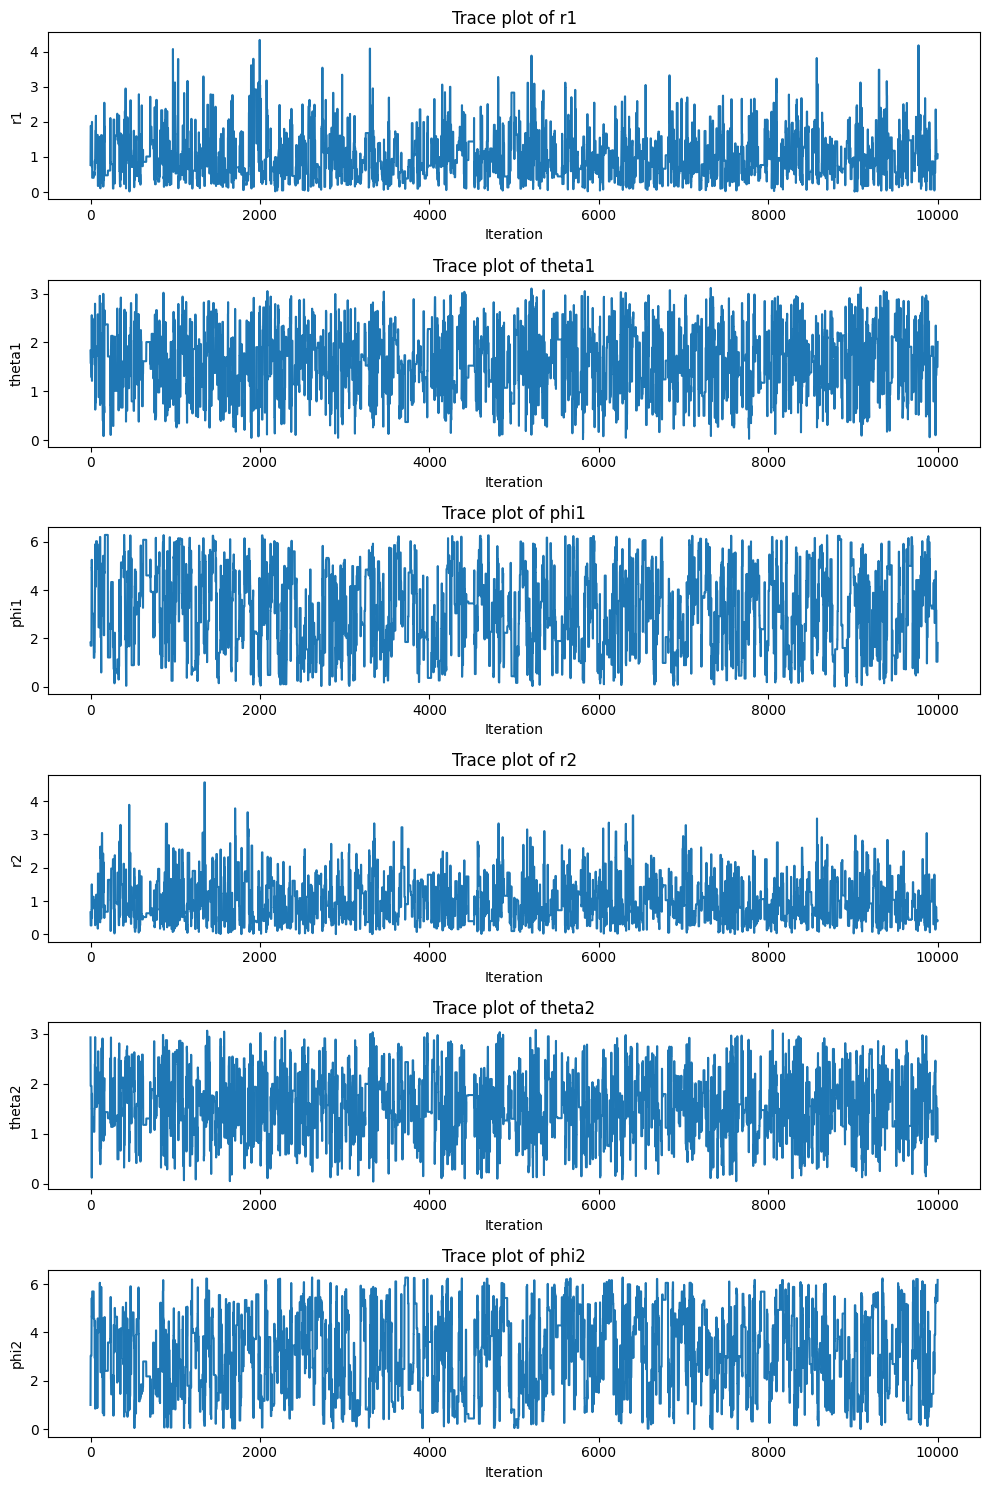

In [61]:
import matplotlib.pyplot as plt

# Plotting the trace of the samples for each variable. This will help to understand how the samples are evolving over iterations and whether they are mixing well.

# Assuming samples is a NumPy array of shape (num_samples, 6)
fig, axs = plt.subplots(6, 1, figsize=(10, 15))
variables = ['r1', 'theta1', 'phi1', 'r2', 'theta2', 'phi2']

for i in range(6):
    axs[i].plot(samples[:, i])
    axs[i].set_title(f'Trace plot of {variables[i]}')
    axs[i].set_xlabel('Iteration')
    axs[i].set_ylabel(variables[i])

plt.tight_layout()
plt.show()

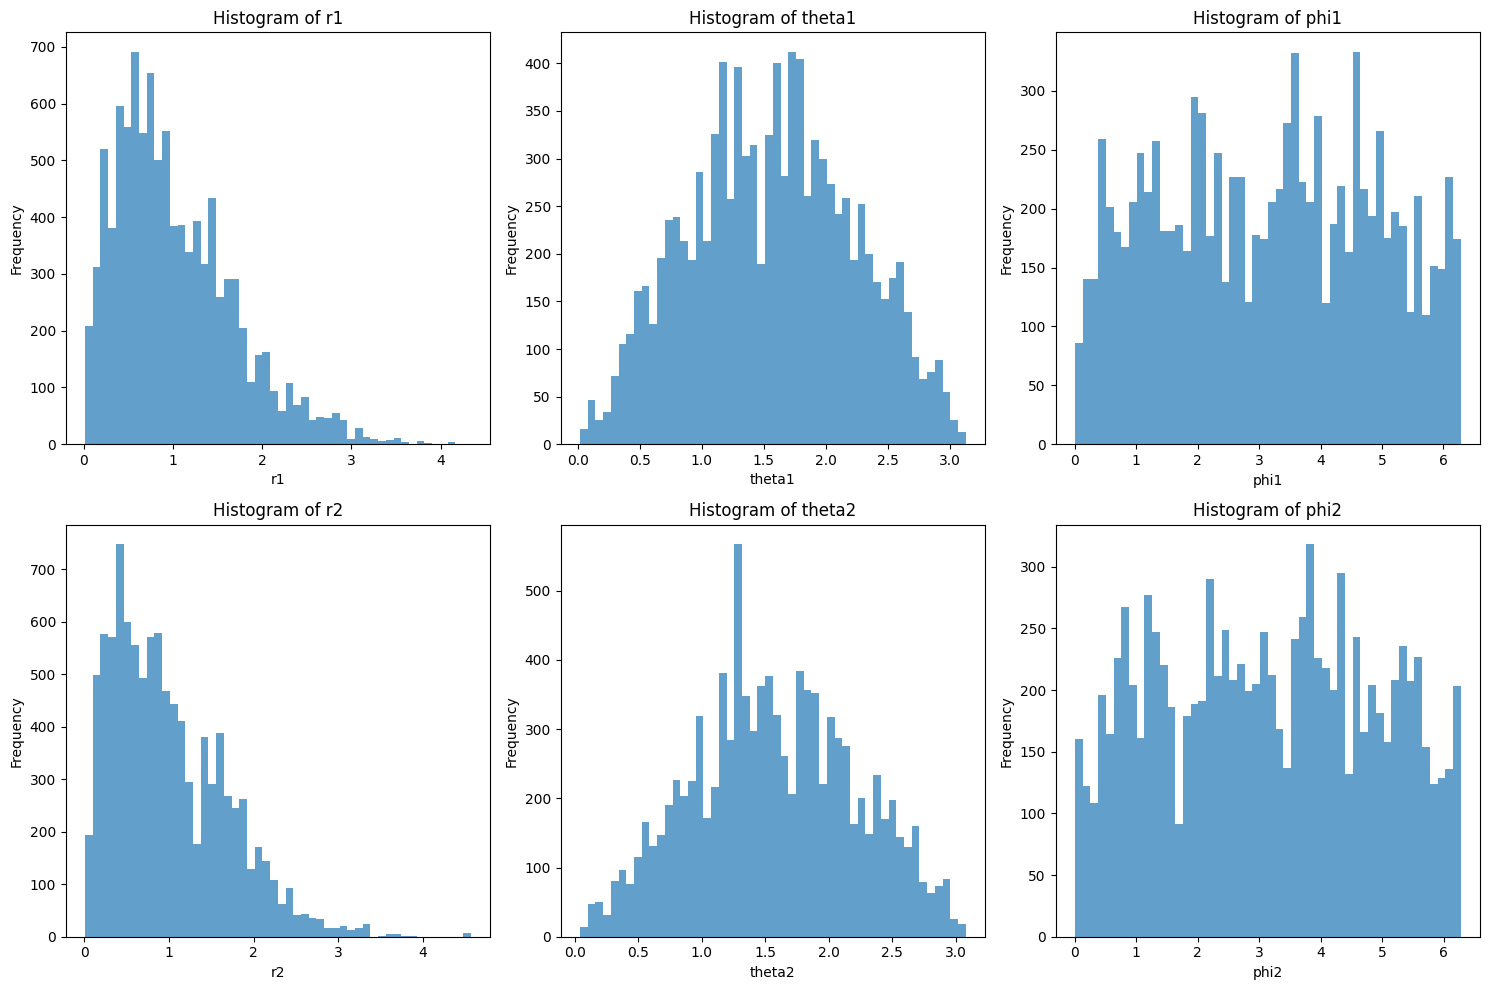

In [62]:
# Plotting histograms for each of the variables to see the distribution of the samples.

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i in range(6):
    axs[i].hist(samples[:, i], bins=50, alpha=0.7)
    axs[i].set_title(f'Histogram of {variables[i]}')
    axs[i].set_xlabel(variables[i])
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

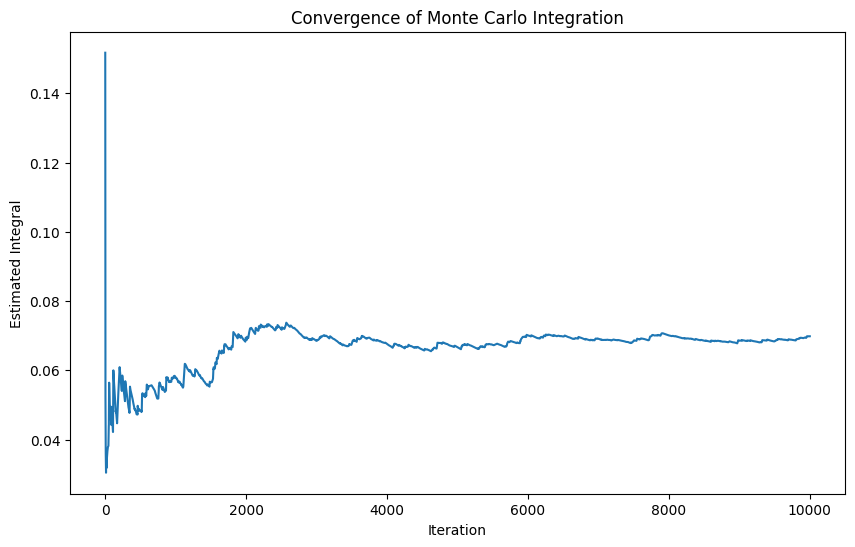

In [64]:
# Plot the running mean of the estimated integral over iterations to see if the Monte Carlo estimate is converging.

values_f = np.array([f(sample) for sample in samples])
# Filter out -inf values
values_f = values_f[~np.isnan(values_f) & ~np.isinf(values_f)]

values_p = np.array([p(sample) for sample in samples])
# Filter out -inf values
values_p = values_p[~np.isnan(values_p) & ~np.isinf(values_p)]

values = values_f/values_p

# Running mean of the integral estimate
integral_estimates = np.cumsum(values) / np.arange(1, len(values) + 1)

plt.figure(figsize=(10, 6))
plt.plot(integral_estimates)
plt.xlabel('Iteration')
plt.ylabel('Estimated Integral')
plt.title('Convergence of Monte Carlo Integration')
plt.show()

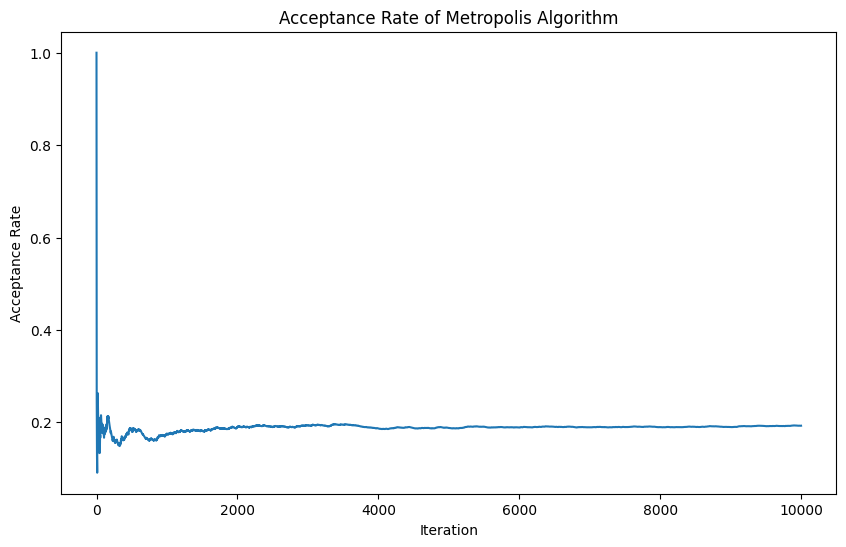

In [65]:
# Plotting the acceptance rate over iterations to understand the efficiency of the Metropolis algorithm. We plot the ratio of accepted moves to the total number of moves
# over iterations.

acceptance_rates = np.cumsum(np.diff(samples, axis=0).any(axis=1)) / np.arange(1, num_samples)
plt.figure(figsize=(10, 6))
plt.plot(acceptance_rates)
plt.xlabel('Iteration')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate of Metropolis Algorithm')
plt.show()